<a href="https://colab.research.google.com/github/NavyaShetty-97/NavyaShetty-97.github.io/blob/master/NaiveBayes_NEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import string
import re
import tqdm
import nltk

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from nltk.corpus import stopwords
from nltk.tokenize import casual_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [ ]:
data = pd.read_json('/content/News_Category_Dataset_v2.json', lines=True)

data.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [ ]:
data.drop(columns=['authors','link','short_description','date'],inplace=True)
data.head()

,category,headline
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...


In [ ]:
data['category'].nunique()

41

In [ ]:
data_category = data.groupby('category').count()
data_category

,headline
category,
ARTS,1509
ARTS & CULTURE,1339
BLACK VOICES,4528
BUSINESS,5937
COLLEGE,1144
COMEDY,5175
CRIME,3405
CULTURE & ARTS,1030
DIVORCE,3426


In [ ]:
data['label'] = data['category'].factorize()[0]
data.head()

,category,headline,label
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,0
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,1
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,1
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,1
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,1


In [ ]:
data_graph = data.groupby('category').count()

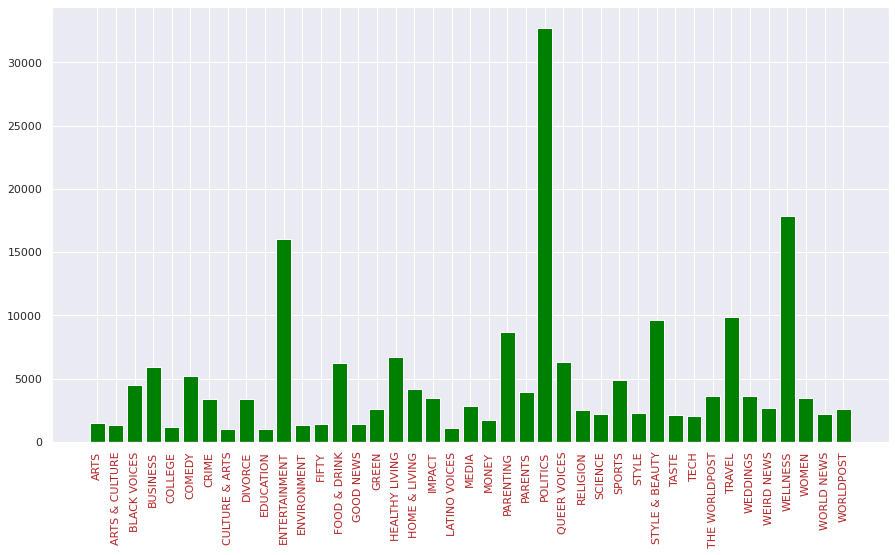

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.bar(data_graph.index,data_graph['headline'],color='green')
plt.xticks(rotation=90,color='firebrick')
plt.show()

In [ ]:
def remove_special_char(text):
    for each in text:
        text=text.replace(each,each.lower())

    for symbol in string.punctuation:
        text=text.replace(symbol,"")
    return text

data['headline'] = data['headline'].apply(remove_special_char)

print(data)

             category                                           headline  \
0               CRIME  there were 2 mass shootings in texas last week...   
1       ENTERTAINMENT  will smith joins diplo and nicky jam for the 2...   
2       ENTERTAINMENT    hugh grant marries for the first time at age 57   
3       ENTERTAINMENT  jim carrey blasts castrato adam schiff and dem...   
4       ENTERTAINMENT  julianna margulies uses donald trump poop bags...   
...               ...                                                ...   
200848           TECH  rim ceo thorsten heins significant plans for b...   
200849         SPORTS  maria sharapova stunned by victoria azarenka i...   
200850         SPORTS  giants over patriots jets over colts among  mo...   
200851         SPORTS  aldon smith arrested 49ers linebacker busted f...   
200852         SPORTS  dwight howard rips teammates after magic loss ...   

        label  
0           0  
1           1  
2           1  
3           1  
4      

In [ ]:
duplicate_drop = data[['category', 'label']].drop_duplicates().sort_values('label')

In [ ]:
duplicate_drop 


,category,label
0,CRIME,0
1,ENTERTAINMENT,1
11,WORLD NEWS,2
12,IMPACT,3
13,POLITICS,4
20,WEIRD NEWS,5
27,BLACK VOICES,6
35,WOMEN,7
37,COMEDY,8
69,QUEER VOICES,9


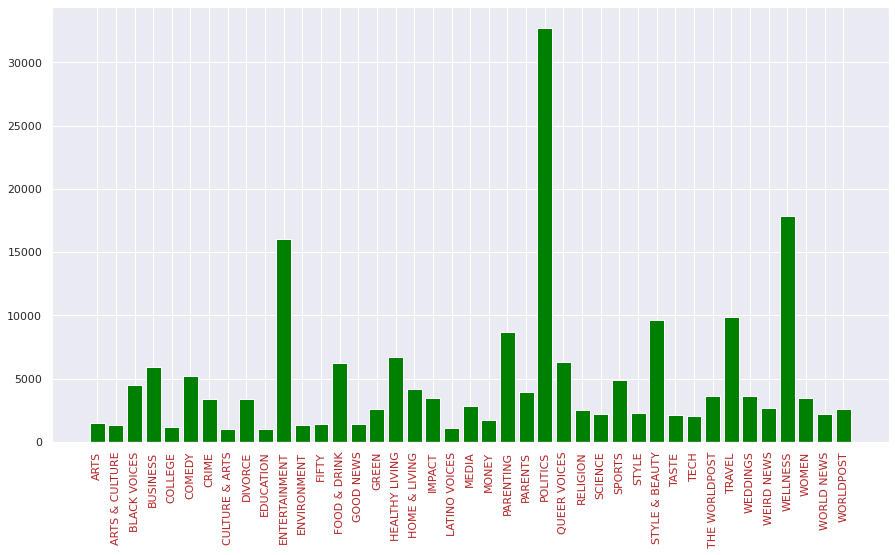

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.bar(data_graph.index,data_graph['headline'],color='green')
plt.xticks(rotation=90,color='firebrick')
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Stopwords
print(", ".join(stopwords.words('english')))
stopWord = set(stopwords.words('english'))

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [ ]:
def preprocess_text(text):
    # 1. Tokenise to alphabetic tokens
    tokeniser = RegexpTokenizer('[^A-Za-z0-9 ]+', '', text)
    tokens = tokeniser.tokenize(text)

    # 2. Lowercase and lemmatise
    lemmatiser = WordNetLemmatizer()
    tokens = [lemmatiser.lemmatize(t.lower()) for t in text]

    return tokens

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def preprocess(text1):
    text1 = " ".join([word for word in str(text1).split() if word not in stopWord]) 
    text1 = re.sub(r'[^A-Za-z0-9 ]+', '', text1)
    return text1

In [ ]:
data_reset = data.sample(frac=1).reset_index(drop=True)[:1000]

In [ ]:
data_reset['headline_preprocess'] = data_reset['headline'].apply(preprocess)

In [ ]:
data_reset['headline_preprocess']

0                   rudest things guests say bride groom
1      lost weight stacy langston quit yoyo dieting l...
2      joe biden tries tamp house dems anger deportat...
3      santa cruz biotechnology agrees record fine se...
4               3 books every girl read starting college
                             ...                        
995    inlaws stories readers reveal worst thing form...
996    martin omalley says hillary clinton let planet...
997    simpsons jabs back apu stereotype claims new e...
998        gregg popovich wishes had guts dye hair blond
999       retailers arent ones working overtime holidays
Name: headline_preprocess, Length: 1000, dtype: object

In [ ]:
data_reset.head()

,category,headline,label,headline_preprocess
0,WEDDINGS,rudest things guests say to the bride and groom,36,rudest things guests say bride groom
1,WELLNESS,i lost weight stacy langston quit yoyo dieting...,31,lost weight stacy langston quit yoyo dieting l...
2,POLITICS,joe biden tries to tamp down house dems anger ...,4,joe biden tries tamp house dems anger deportat...
3,GREEN,santa cruz biotechnology agrees to record fine...,23,santa cruz biotechnology agrees record fine se...
4,COLLEGE,3 books every girl should read before starting...,19,3 books every girl read starting college


**Using MultinomialNB**

In [ ]:
y_label = data_reset["label"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')
X_train_matrix = vect.fit_transform(data_reset["headline"]) 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_matrix, y_label, test_size=0.3)
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
 
print(f'Train Accuracy of Multinomial Naive Bayes: {classifier.score(X_train, y_train)}')
print(f'Test Accuracy of Multinomial Naive Bayes: {classifier.score(X_test, y_test)}')

predicted_result = classifier.predict(X_test)

Train Accuracy of Multinomial Naive Bayes: 0.9271428571428572
Test Accuracy of Multinomial Naive Bayes: 0.27


In [ ]:
prob = {}
All = data_reset["label"].value_counts().sum()

In [ ]:
for index, catg in enumerate (data_reset["label"].value_counts(sort = False)):
    prob[index] = catg / All

print("Probability of each class:")
print("\n".join("{}: {}".format(k, v) for k, v in prob.items()))

Probability of each class:
0: 0.02
1: 0.097
2: 0.169
3: 0.011
4: 0.008
5: 0.008
6: 0.05
7: 0.053
8: 0.006
9: 0.029
10: 0.03
11: 0.018
12: 0.014
13: 0.005
14: 0.012
15: 0.021
16: 0.052
17: 0.009
18: 0.081
19: 0.029
20: 0.024
21: 0.015
22: 0.016
23: 0.033
24: 0.007
25: 0.019
26: 0.009
27: 0.023
28: 0.012
29: 0.024
30: 0.024
31: 0.007
32: 0.008
33: 0.01
34: 0.011
35: 0.013
36: 0.008
37: 0.006
38: 0.003
39: 0.005
40: 0.001


**Gaussian Naive Bayes**

In [ ]:
headline_words = []
for hline in data_reset.headline_preprocess:
  headline_words.append(Counter(casual_tokenize(hline)))

In [ ]:
dataset_headline = pd.DataFrame.from_records(headline_words) #gets datafarme in terms of 0 or 1
dataset_headline.fillna(0,inplace=True) #to fill the null values with 0

In [ ]:
dataset_headline['label'] = data_reset['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(dataset_headline.drop(columns=['label']).to_numpy(),dataset_headline['label'].to_numpy(),test_size=0.2)

In [ ]:
class GaussianNaiveBayes:

    def fit(self, X, y):
        number_samples,number_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
      
        # initialize mean, var, and prior
        self._mean = np.zeros((n_classes, number_features), dtype=np.float64)
        self._var = np.zeros((n_classes, number_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        #calculate for each class
        for idx, c in enumerate(self.classes):
            X_c = X[y==c] 
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(number_samples) 

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self.classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
            

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp((x - mean)**2 / -(2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator



In [ ]:
gaussianNB = GaussianNaiveBayes()

gaussianNB.fit(X_train,Y_train)
y_pred = gaussianNB.predict(x_test)
y_predTrain = gaussianNB.predict(X_train)

accuracyTest = round(accuracy_score(y_test, y_pred)*100, 2)

print(f'Test Accuracy: {accuracyTest}')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


Test Accuracy: 0.5
